In [135]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

In [136]:
ds = xr.open_mfdataset('/home/neil/Downloads/era-int/data*.nc')

In [137]:
msl=ds.msl
msl_jul = msl[msl.time.dt.season=='JJA']
julpsl=msl_jul.mean(dim='time')

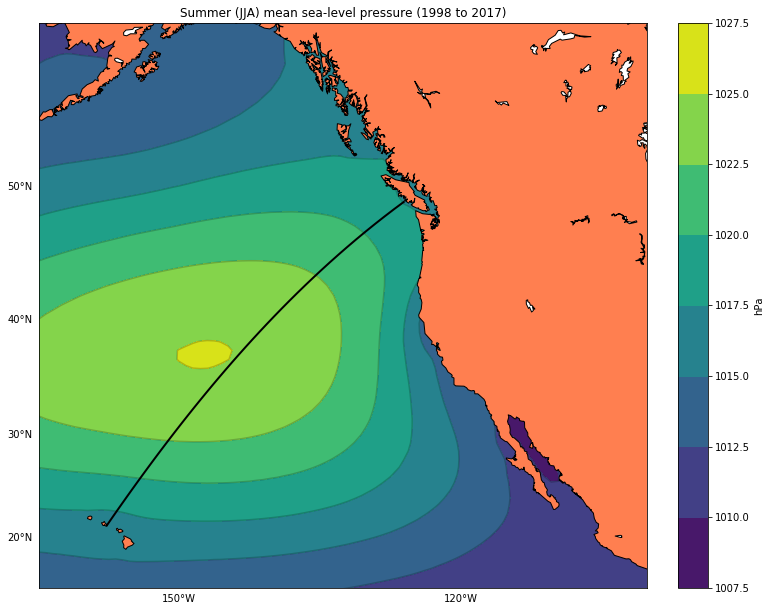

In [148]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
fig, ax = plt.subplots(1, figsize=(12,12))
m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-165,urcrnrlon=-100,lat_ts=20,resolution='l', ax=ax)
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,10.),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1], linewidth=0)
#m.drawmapboundary(fill_color='aqua')
plt.title("Summer (JJA) mean sea-level pressure (1998 to 2017)")
m.drawgreatcircle(-126, 49, -157.72, 21.3, del_s=100.0, color='k', linewidth=2)
lons,lats=np.meshgrid(julpsl.longitude.values, julpsl.latitude.values)
cs=m.contourf(lons, lats, julpsl.values/100., latlon=True, levs=10)
m.contour(lons, lats, julpsl.values, latlon=True, colors='k', alpha=0.2, zorder=1)
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('hPa')
fig.savefig('Summer-pacific-msl.png', dpi=300, bbox_inches='tight')

In [139]:
ds18 = xr.open_dataset('/home/neil/Downloads/era-int/jul2018.nc')
jul18psl=ds18.msl.loc['2018-07-20':'2018-07-31'].mean(dim='time')
print jul18psl

<xarray.DataArray 'msl' (latitude: 241, longitude: 480)>
array([[ 100701.85312 ,  100701.85312 ,  100701.85312 , ...,  100701.85312 ,
         100701.85312 ,  100701.85312 ],
       [ 100724.161333,  100724.29226 ,  100724.402069, ...,  100723.430678,
         100723.692531,  100723.924821],
       [ 100742.047605,  100742.343246,  100742.605099, ...,  100740.742562,
         100741.215587,  100741.621037],
       ..., 
       [ 101654.395265,  101655.020335,  101655.590499, ...,  101648.279723,
         101650.328092,  101652.36379 ],
       [ 101601.623374,  101600.537949,  101599.427185, ...,  101602.793267,
         101602.387817,  101601.99926 ],
       [ 101541.181714,  101541.181714,  101541.181714, ...,  101541.181714,
         101541.181714,  101541.181714]])
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...


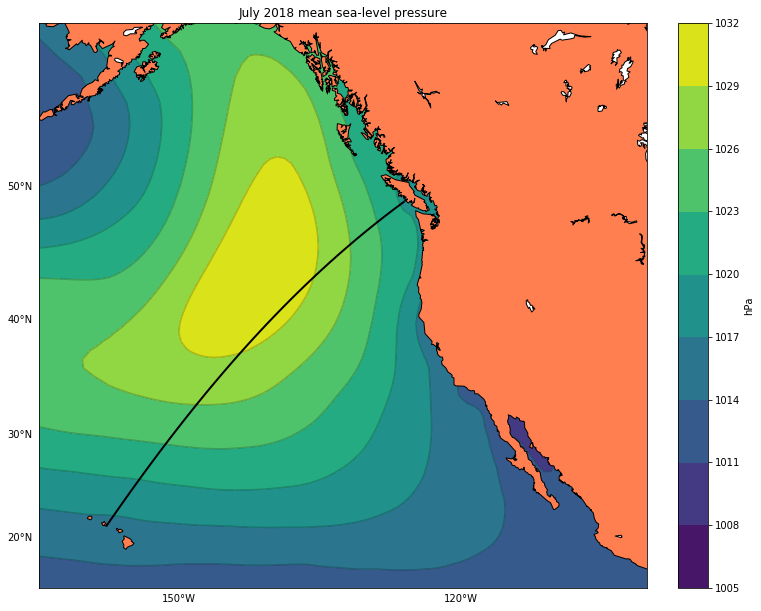

In [144]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
fig, ax = plt.subplots(1, figsize=(12,12))
m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-165,urcrnrlon=-100,lat_ts=20,resolution='l', ax=ax)
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
#m.drawmapboundary(fill_color='aqua')
plt.title("July 2018 mean sea-level pressure")
m.drawgreatcircle(-126, 49, -157.72, 21.3, del_s=100.0, color='k', linewidth=2)
#m.drawgreatcircle(-125., 48.2, -157.72, 21.3, del_s=100.0, color='r', linewidth=2)
m.drawparallels(np.arange(0.,91.,10.),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1], linewidth=0)
lons,lats=np.meshgrid(julpsl.longitude.values, julpsl.latitude.values)
cs=m.contourf(lons, lats, jul18psl.values/100., latlon=True, levs=10)
m.contour(lons, lats, jul18psl.values, latlon=True, colors='k', linestyle='--', alpha=0.2, zorder=1)
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('hPa')
fig.savefig('Jul18-pacific-msl.png', dpi=300)

In [149]:
ds = xr.open_mfdataset('/home/neil/Downloads/era-int/data*.nc')

msl=ds.msl
msl_jul = msl[msl.time.dt.season=='JJA']
julpsl=msl_jul.mean(dim='time')

winpsl=msl[msl.time.dt.season=='DJF'].mean(dim='time')

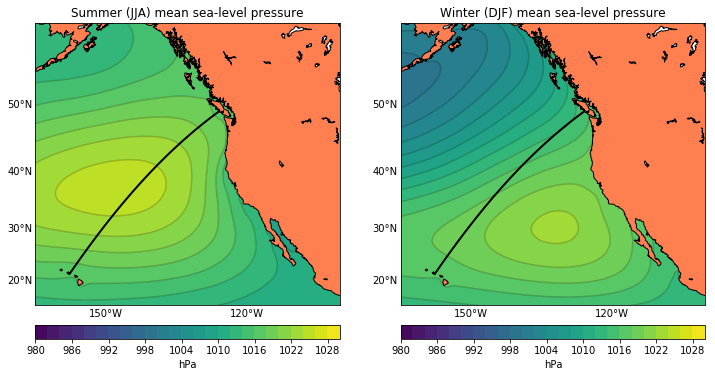

In [173]:
fig, (axl, axr) = plt.subplots(1,2, figsize=(12,12))

levs=np.arange(980, 1031,2)

m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-165,urcrnrlon=-100,lat_ts=20,resolution='l', ax=axl)
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,10.),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1], linewidth=0)
#m.drawmapboundary(fill_color='aqua')
axl.set_title("Summer (JJA) mean sea-level pressure")
m.drawgreatcircle(-126, 49, -157.72, 21.3, del_s=100.0, color='k', linewidth=2)
lons,lats=np.meshgrid(julpsl.longitude.values, julpsl.latitude.values)
cs=m.contourf(lons, lats, julpsl.values/100., latlon=True, levels=levs)
m.contour(lons, lats, julpsl.values/100., latlon=True, colors='k', alpha=0.2, zorder=1, levels=levs)
cbar = m.colorbar(cs,location='bottom',pad="7%")
cbar.set_label('hPa')

m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-165,urcrnrlon=-100,lat_ts=20,resolution='l', ax=axr)
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,10.),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1], linewidth=0)
#m.drawmapboundary(fill_color='aqua')
axr.set_title("Winter (DJF) mean sea-level pressure")
m.drawgreatcircle(-126, 49, -157.72, 21.3, del_s=100.0, color='k', linewidth=2)
lons,lats=np.meshgrid(julpsl.longitude.values, julpsl.latitude.values)
cs=m.contourf(lons, lats, winpsl.values/100., latlon=True, levels=levs)
m.contour(lons, lats, winpsl.values/100., latlon=True, colors='k', alpha=0.2, zorder=1, levels=levs)

cbar = m.colorbar(cs,location='bottom',pad="7%")
cbar.set_label('hPa')

fig.savefig('Pacific-msl-seasons.png', dpi=300, bbox_inches='tight')

In [184]:
u10sum=ds.u10[ds.u10.time.dt.season=='JJA'].mean(dim='time')
v10sum=ds.v10[ds.v10.time.dt.season=='JJA'].mean(dim='time')

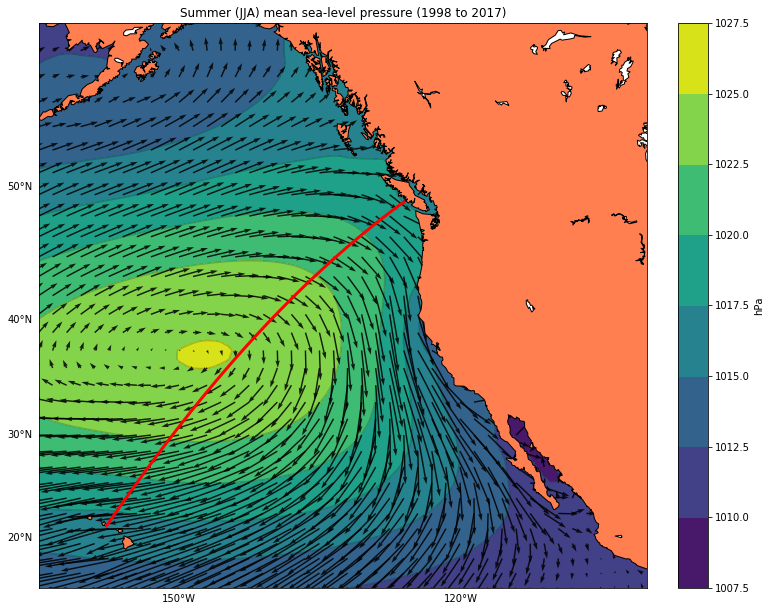

In [188]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
fig, ax = plt.subplots(1, figsize=(12,12))
m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=60,\
            llcrnrlon=-165,urcrnrlon=-100,lat_ts=20,resolution='l', ax=ax)
m.drawcoastlines()
m.fillcontinents(color='coral')
# draw parallels and meridians.
m.drawparallels(np.arange(0.,91.,10.),labels=[1,0,0,0], linewidth=0)
m.drawmeridians(np.arange(-180.,181.,30.),labels=[0,0,0,1], linewidth=0)
#m.drawmapboundary(fill_color='aqua')
plt.title("Summer (JJA) mean sea-level pressure (1998 to 2017)")
m.drawgreatcircle(-126, 49, -157.72, 21.3, del_s=100.0, color='r', linewidth=3)
lons,lats=np.meshgrid(julpsl.longitude.values, julpsl.latitude.values)
cs=m.contourf(lons, lats, julpsl.values/100., latlon=True, levs=10)
m.contour(lons, lats, julpsl.values, latlon=True, colors='k', alpha=0.2, zorder=1)
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('hPa')
#fig.savefig('Summer-pacific-msl.png', dpi=300, bbox_inches='tight')
skip=(slice(None,None,2),slice(None,None,2))
m.quiver(lons[skip], lats[skip], u10sum.values[skip], v10sum.values[skip], latlon=True, scale=75, 
         cmap='Reds', alpha=0.85)

In [181]:
help(m.quiver)

Help on method quiver in module mpl_toolkits.basemap:

quiver(self, x, y, u, v, *args, **kwargs) method of mpl_toolkits.basemap.Basemap instance
    Make a vector plot (u, v) with arrows on the map.
    
    Arguments may be 1-D or 2-D arrays or sequences
    (see matplotlib.pyplot.quiver documentation for details).
    
    If ``latlon`` keyword is set to True, x,y are intrepreted as
    longitude and latitude in degrees.  Data and longitudes are
    automatically shifted to match map projection region for cylindrical
    and pseudocylindrical projections, and x,y are transformed to map
    projection coordinates. If ``latlon`` is False (default), x and y
    are assumed to be map projection coordinates.
    
    Extra keyword ``ax`` can be used to override the default axis instance.
    
    Other \*args and \**kwargs passed on to matplotlib.pyplot.quiver.

